In [3]:
import time

from src.environments import StochasticGridEnvironment
from src.agents import DoubleDQNAgent
from src.value_functions import ValueFunction
from src.utils import run_env

import matplotlib.pyplot as plt
import numpy as np

In [7]:
env = StochasticGridEnvironment(max_timesteps=30)

In [12]:
ddqn_agent = DoubleDQNAgent(env, 'gridworld', 'assignment2_part3',ValueFunction, convergence_value=16, learning_rate=1e-4, batch_size=128,discount_factor=0.99, buffer_size=10000)

In [13]:
ddqn_agent.trainer(episodes = 1200)

  0%|          | 0/1200 [00:00<?, ?it/s]

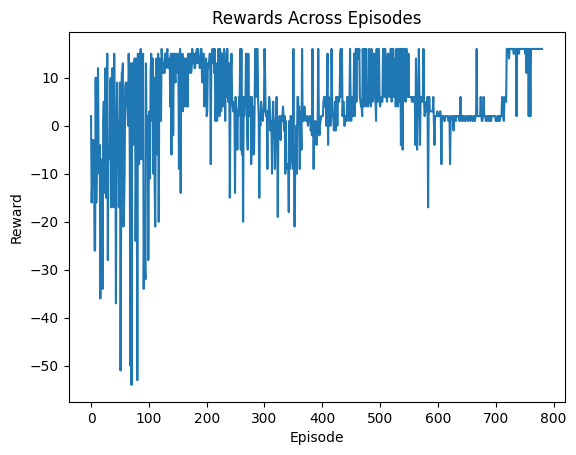

In [14]:
# Assuming dqn_agent.reward_across_episodes contains the rewards across episodes
plt.plot(ddqn_agent.reward_across_episodes)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Across Episodes')
plt.show()

In [24]:
def run_env(env, online_value_function, episodes = 100):
    
    reached_end_goal = 0
    rewards = []
    
    for episode in range(episodes):
        observation, _ = env.reset()
        terminated = False
        
        reward_per_episode = 0
        
        # For each episode
        while not terminated:
            # Make a Transistion
            action = torch.argmax(online_value_function.act(observation), dim=1).item()
            new_observation, reward, terminated, truncated, info = env.step(action)
            reward_per_episode += reward
            observation = new_observation
        
        if info['Termination Message'] == 'Goal Position Reached !!!':
            reached_end_goal += 1
        rewards.append(reward_per_episode)
    
    env.close()
    return rewards

In [16]:
rewards = run_env(env, ddqn_agent.q_value_function)

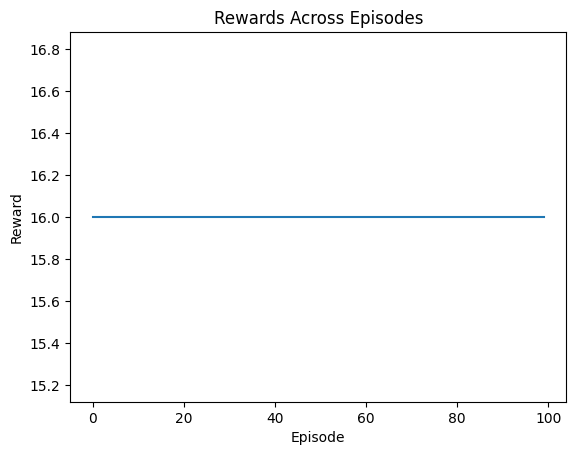

In [17]:
# Assuming dqn_agent.reward_across_episodes contains the rewards across episodes
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Across Episodes')
plt.show()

In [18]:
print('Average Reward:',np.mean(rewards))

Average Reward: 16.0
